In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [88]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [89]:
housing.keys()  

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [90]:
x = pd.DataFrame(housing.data, columns = housing.feature_names )

In [91]:
y = pd.DataFrame(housing.target, columns = housing.target_names)

In [50]:
x.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [51]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [54]:
model = LinearRegression()
model

LinearRegression()

In [55]:
model.fit(x_train, y_train)

LinearRegression()

In [56]:
pred = model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [58]:
r2_score(y_test, pred)

0.6060486034508252

In [59]:
mean_absolute_error(y_test, pred)

0.535034820113814

In [60]:
mean_squared_error(y_test, pred)

0.5280869533497162

In [61]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)

x_test_scaler = scaler.transform(x_test)


# y_train_scaler = scaler.fit_transform(y_train)
# y_test_scaler = scaler.transform(y_test)

In [62]:
model

LinearRegression()

In [63]:
model.fit(x_train_scaler, y_train)

LinearRegression()

In [64]:
pred_ = model.predict(x_test_scaler)

In [65]:
r2_score(y_test, pred_) 

0.6060486034508253

In [66]:
mean_absolute_error(y_test, pred_)

0.5350348201138123

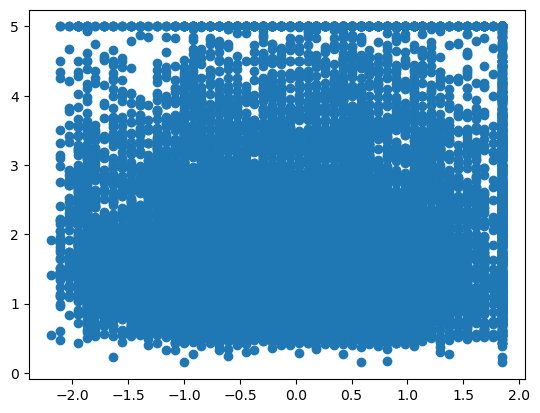

In [67]:
plt.scatter(x_train_scaler[:,1], y_train[:])

# Now dropping some columns then find the predictions

In [92]:
import seaborn as sns

In [93]:
Matrix = x.corr()

<Axes: >

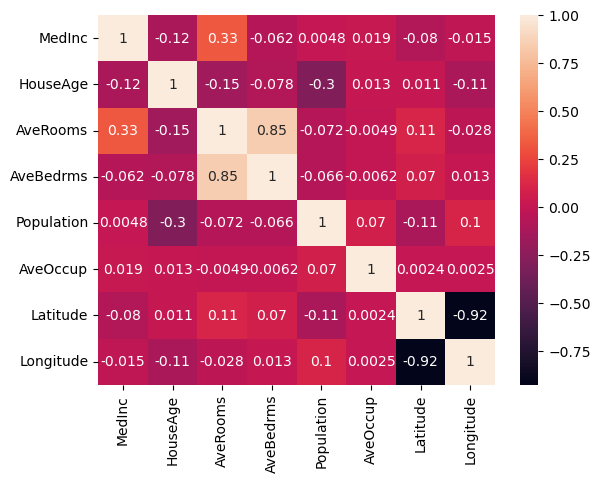

In [94]:
sns.heatmap(Matrix, annot = True)

In [95]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [96]:
x = x.drop(columns = ['Longitude', 'Latitude', 'AveOccup', 'Population'])

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler


In [119]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3,random_state=213)

In [120]:
s = StandardScaler()
s

StandardScaler()

In [121]:
# train_xscaler = s.fit_transform(train_x)
# test_xscaler = s.transform(test_x)

In [122]:
model = LinearRegression()
model

LinearRegression()

In [123]:
model.fit(train_x, train_y)

LinearRegression()

In [124]:
pred_ = model.predict(test_x)
pred_ == test_y

,MedHouseVal
14454,False
14740,False
6590,False
19472,False
18596,False
...,...
2389,False
15089,False
19817,False
3435,False


In [125]:
r2_score(test_y, pred_)

0.5320134298334489

In [126]:
mean_absolute_error(test_y, pred_)

0.5789360966121009

In [127]:
mean_squared_error(test_y, pred_)

0.6275504756888349